In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc
%matplotlib inline 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [5]:
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [8]:
df_train = pd.read_csv('./data/house_data/train.csv')
print(df_train.columns[:10])
print(df_train.head(3))
print(df_train.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]
(1460, 81)


In [9]:
## 집 가격의 통계적 분석
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

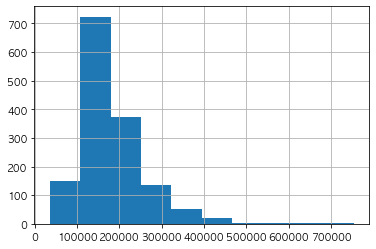

In [10]:
## 집 가격의 히스토그램
df_train['SalePrice'].hist()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

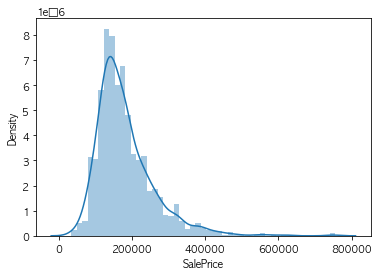

In [13]:
sns.distplot(df_train['SalePrice'])
# 차트 - matplotlib : 기본 차트 - 수직, 수평막대, 점, 히스토, 선그래프, 원
## 차트 - seaborn : 기본 + 혼합 차트
### seaborn이 matplotlib보다 한 단계 위이다. seaborn을 통해서 데이터 흐름까지 파악을 한 히스토그램을 만들수가 있다.

In [14]:
print("Skewness: %f" % df_train['SalePrice'].skew()) # 왜곡
print("Kurtosis: %f" % df_train['SalePrice'].kurt()) # 첨도

Skewness: 1.882876
Kurtosis: 6.536282


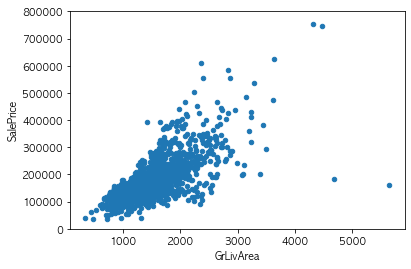

In [15]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

In [16]:
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


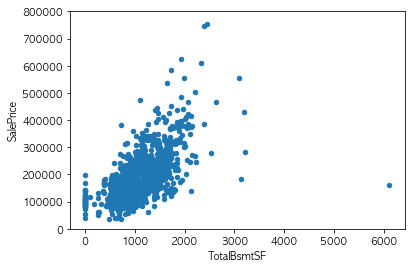

In [17]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

(-0.5, 9.5, 0.0, 800000.0)

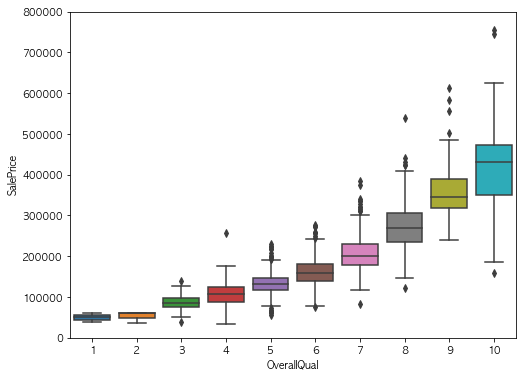

In [18]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) # 참고 : 
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)